In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

df = pd.read_excel("TestData.xlsx")

xdata = np.array(df['TIME'])
ydata = np.array(df['yData'])


In [3]:
def linear_fit(xdata,ydata):
    
    X = np.vstack((xdata, np.ones(len(xdata)))).T
    Y = ydata.T
    m , c = np.matmul(np.matmul( np.linalg.inv(np.matmul(X.T , X)) , X.T ) , Y)
    
    return m,c

In [4]:
m , c = linear_fit(xdata, ydata)

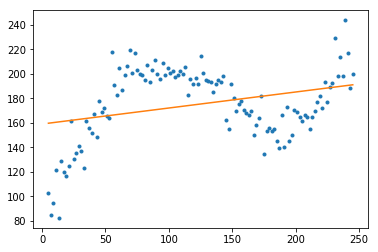

In [5]:
plt.plot(xdata,ydata,'.')
plt.plot(xdata , m * xdata + c)
plt.show()

In [6]:
def piecewise_lin_fit(xdata, ydata, n_segments, b=[]):
    n_points = len(xdata)
    
    #if len(b) == 0:
        #b = np.zeros(n_segments + 1)
        #for i in range(0, len(b)):
        #    b[i] = xdata[0] + i * (xdata[-1] - xdata[0]) / n_segments
        # guess value
    b[0] = xdata[0];b[-1]=xdata[-1]
    
    A = np.zeros([n_points, len(b)])
    for j in range(0, len(A[0,:])):
        for i in range(0, len(A[:,0])):
            if j == 0:
                A[i,j] = 1
            elif j == 1:
                A[i,j] = xdata[i] - b[0]
            else:
                if xdata[i] > b[j - 1]:
                    A[i,j] = xdata[i] - b[j - 1]
                    
    beta = np.matmul(np.matmul( np.linalg.inv(np.matmul(A.T , A)) , A.T ) , ydata.T)
    
    return b, beta

In [7]:
b,beta = piecewise_lin_fit(xdata, ydata, 4, [  5,  65, 125, 185, 245])
print(b,beta)

[5, 65, 125, 185, 245] [95.32515877  1.80666239 -1.88157498 -0.8195882   1.99976804]


In [8]:
def plot_pwlf(xdata, ydata, b, beta):
    plt.plot(xdata,ydata, '.')
    for i in range(0,len(b)-1):
        xtoplot = xdata[xdata<b[i+1]]
        xtoplot = xtoplot[xtoplot>=b[i]]
        ytoplot = beta[0] * np.ones(len(xtoplot))
        for j in range(0,i+1):
            ytoplot = ytoplot + beta[j+1] * (xtoplot - b[j])

        plt.plot(xtoplot,ytoplot,color='red')

    plt.show()
    return

In [9]:
def y_calc(x, b, beta):
    b_added = np.sort(np.append(b, x))
    index = np.where(b_added == x)
    y = beta[0]
    for j in range(0, index[0][0]):
        y = y + beta[j + 1] * (x - b[j])
    
    return y

def calc_error(b, xdata, ydata, n_segments):
    error = []
    b1, beta = piecewise_lin_fit(xdata, ydata, n_segments, b)
    for i in range(0,len(xdata)):
        error.append((ydata[i] - y_calc(xdata[i],b,beta))**2)

    return np.sum(error)

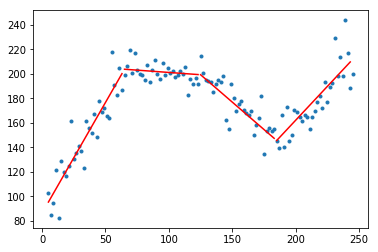

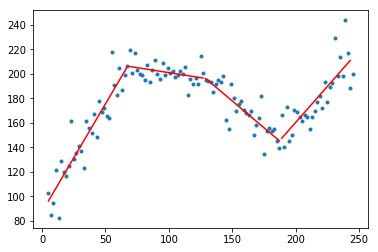

In [13]:
from scipy.optimize import least_squares
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
n_segments = 4
b_guess = np.zeros(n_segments + 1)
for i in range(0, len(b_guess)):
    b_guess[i] = xdata[0] + i * (xdata[-1] - xdata[0]) / n_segments
    
b_guess1, beta_guess = piecewise_lin_fit(xdata, ydata, n_segments, b_guess)

plot_pwlf(xdata, ydata, b_guess1, beta_guess)

res = minimize(calc_error, b_guess, args=(xdata,ydata,n_segments))
#res = differential_evolution(calc_error, [(min(xdata),max(xdata)), (min(xdata),max(xdata)), (min(xdata),max(xdata)), (min(xdata),max(xdata)), (min(xdata),max(xdata))], args=(xdata,ydata,n_segments))

b_sol, beta_sol = piecewise_lin_fit(xdata, ydata, n_segments, res.x)

plot_pwlf(xdata, ydata, b_sol, beta_sol)

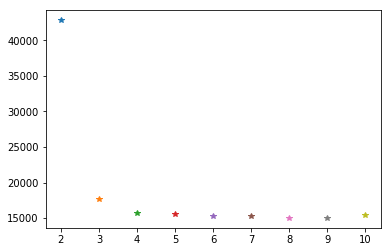

In [10]:
for n_segments in range(2,11):
    try:
        b_guess = np.zeros(n_segments + 1)
        for i in range(0, len(b_guess)):
            b_guess[i] = xdata[0] + i * (xdata[-1] - xdata[0]) / n_segments

        res = minimize(calc_error, b_guess, args=(xdata,ydata,n_segments))
        b_sol, beta_sol = piecewise_lin_fit(xdata, ydata, n_segments, res.x)

        plt.plot(n_segments, res.fun, '*')
    except:
        continue
        
plt.show()

In [15]:
import pwlf
